# Trump Deep Learning


In [1]:
import numpy as np
import json
import tensorflow as tf
from tensorflow import keras
from jass.logs.game_log_entry import GameLogEntry
import pandas as pd
from pathlib import Path


# Create List of Games
Open training data
jass.kit-Version 2.0.3 has to be installed or pulled for this (not the old 2.0.2)


In [3]:
path_to_data = Path('data')
entry1_list = [] # List of lines
entry1_GLE_list = []          # GameLogEntry-List

entry2_list = [] # List of lines
entry2_GLE_list = []          # GameLogEntry-List

entry3_list = [] # List of lines
entry3_GLE_list = []          # GameLogEntry-List

entry4_list = [] # List of lines
entry4_GLE_list = []          # GameLogEntry-List

entry5_list = [] # List of lines
entry5_GLE_list = []          # GameLogEntry-List

entry6_list = [] # List of lines
entry6_GLE_list = []          # GameLogEntry-List

entry7_list = [] # List of lines
entry7_GLE_list = []          # GameLogEntry-List

entry8_list = [] # List of lines
entry8_GLE_list = []          # GameLogEntry-List

entry9_list = [] # List of lines
entry9_GLE_list = []          # GameLogEntry-List

entry10_list = [] # List of lines
entry10_GLE_list = []          # GameLogEntry-List

# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0001.txt") as file:
    # readline returns one line from the file
    entry1_list=file.read().splitlines()
    print(len(entry1_list))

for c in entry1_list:
    content = json.loads(c)
    # print(content["game"])
    entry1_GLE_list.append(GameLogEntry.from_json(content))
    

# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0002.txt") as file:
    # readline returns one line from the file
    entry2_list=file.read().splitlines()
    print(len(entry2_list))

for c in entry2_list:
    content = json.loads(c)
    # print(content["game"])
    entry2_GLE_list.append(GameLogEntry.from_json(content))    
    
# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0003.txt") as file:
    # readline returns one line from the file
    entry3_list=file.read().splitlines()
    print(len(entry3_list))

for c in entry3_list:
    content = json.loads(c)
    # print(content["game"])
    entry3_GLE_list.append(GameLogEntry.from_json(content))    
    
# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0004.txt") as file:
    # readline returns one line from the file
    entry4_list=file.read().splitlines()
    print(len(entry4_list))

for c in entry4_list:
    content = json.loads(c)
    # print(content["game"])
    entry4_GLE_list.append(GameLogEntry.from_json(content))    
    

100000
100000
100000
100000


### entry game, date, player

GameState has following entries: 
game:
dealer, player, trump, forehand, declared_trump
hands, tricks, trick_winner, trick_points, trick_first_player,
current_trick, nr_tricks, nr_cards_in_trick
nr_played_cards, points

date: the date, when the game was played
playerid's: the player which participated the game

In [37]:
# print(type(entry1_GLE_list[0].game))
# print(type(entry1_GLE_list[0].date))
# print(type(entry1_GLE_list[0].player_ids))
# print(entry1_GLE_list[0].game.dealer)
# print(entry1_GLE_list[0].game.declared_trump)
# print(type(entry1_GLE_list[0]))

#for n in range(1,100):
#    print(entry1_GLE_list[n].game.trump)

#secret hands
We are not allowed to see the hands of the other players --> 
we can only use the hands we are able to observe (tricks and played cards)
but at the end of the match we know the hands of all players. These cards could be accessed
by calculate_starting_hands_from_game

In [5]:
# entry.game.hands

The statistics about each player
id: the id of the player
mean: the mean points in each game
std: the deviation from this mean
nr: the number of games played

In [6]:
with open(path_to_data / "player_all_stat.json") as file:
    playerLog = json.load(file)  
#for i in playerLog:
#    print(i['id'])

# extract successful player
First we extract the ids of the most successful players

In [7]:
bestPlayer = []
print(len(playerLog))
for i in playerLog:
    if i['mean'] >80:
        bestPlayer.append(i['id'])
#    print(i['id'])
print(len(bestPlayer))

4609
1189


# extract entries of most successful player and connect data
Then we extract only the games, where the most successful players declared trump

In [42]:
entry1_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry2_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry3_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry4_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entryTotal_GLE_list_best = []


for i in entry1_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            entry1_GLE_list_best.append(i)
            
for i in entry2_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            entry2_GLE_list_best.append(i)
            
for i in entry3_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            entry3_GLE_list_best.append(i)
            
for i in entry4_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            entry4_GLE_list_best.append(i)

# By this we reduce the data, only the best player are used.
entryTotal_GLE_list_best = entry1_GLE_list_best + entry2_GLE_list_best + entry3_GLE_list_best + entry4_GLE_list_best
print(len(entry1_GLE_list_best))
print(len(entry2_GLE_list_best))
print(len(entry3_GLE_list_best))
print(len(entry4_GLE_list_best))
print(len(entryTotal_GLE_list_best))

#for n in range(1,5):
#    print(entryTotal_GLE_list_best[n].game.trump)

11818
11616
12074
13789
49297
3
2
5
5


we check if: dealer, declared_trump and forehand are ok

In [17]:
#for c in entryTotal_GLE_list_best:
#    print('dealer: {} '.format(c.game.dealer))
#    print('forehand: {} '.format(c.game.forehand))
#    print('declaring player: {} '.format(c.game.declared_trump))

# extract the hand
Now we have to extract the hand of the declaring player, the forehand, 

In [74]:
from jass.game.game_state_util import calculate_starting_hands_from_game
from tensorflow.keras.utils import to_categorical

# We create the raw input and the raw output
obsHandList=[]
obsForehandList=[]

# Input and Output for Training
obsInput=[]
obsTrumpList=[]

# entryTotal_GLE_list_best[0].game
for c in entryTotal_GLE_list_best:
    obsPlayerHand =[]
    obsDecPlayer= c.game.declared_trump #the declaring player
    obsHands=calculate_starting_hands_from_game(c.game) 
    obsPlayerHand=obsHands[obsDecPlayer]
    
    obsforehand=c.game.forehand
    obsHandList.append(obsPlayerHand)
    obsForehandList.append(obsforehand)
    obsInput.append(np.append(obsPlayerHand,obsforehand))
    
    # Trump is 1-hot-encoded
    obsTrumpList.append(c.game.trump)
    # print('trumpi: {} '.format(i.game.trump))
    # print('game: {} '.format(i.game))

#Trump is 1-hot-encoded
obsTrumpList=to_categorical(obsTrumpList)
#print('obsHandList: {} '.format(obsHandList[0]))
#print('obsForehandList: {} '.format(obsForehandList))

for n in range(1,5):
    print('obsInput: {} '.format(obsInput[n]))
    print('obsTrump: {} '.format(obsTrumpList[n]))
    print('obsInput type: {} '.format(type(obsInput)))
    print('obsTrump type: {} '.format(type(obsTrumpList)))

obsInput: [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0] 
obsTrump: [0. 0. 0. 1. 0. 0.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 
obsInput: [0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0] 
obsTrump: [0. 0. 1. 0. 0. 0.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 
obsInput: [0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1] 
obsTrump: [0. 0. 0. 0. 0. 1.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 
obsInput: [1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1] 
obsTrump: [0. 0. 0. 0. 0. 1.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 


In [75]:
obsInputNumpy=np.array(obsInput, dtype=np.float32)
obsTrumpNumpy= np.array(obsTrumpList, dtype=np.float32)

In [78]:
rawDataRows, rawDataColumns = obsInputNumpy.shape
OutputRows, OutputColumns = obsTrumpNumpy.shape
EntryListtRows= np.size(entryTotal_GLE_list_best)
print('rawDataColumns ' + str(rawDataColumns) )
print('categoryColumns ' + str(OutputColumns))
print('rawDataRows ' + str(rawDataRows) )
print('OutputRows ' + str(OutputRows) )

rawDataColumns 37
categoryColumns 6
rawDataRows 49297
OutputRows 49297


# Split training/validation and test data

In [87]:
obsInputNumpyTest,obsInputNumpyValidation = np.array_split(obsInputNumpy, [int(OutputRows/10)])
obsOutputNumpyTest,obsOutputNumpyValidation = np.array_split(obsTrumpNumpy, [int(OutputRows/10)])

In [89]:
InputRowsVal, InputColumnsVal = obsInputNumpyValidation.shape
InputRowsTest, InputColumnsTest = obsInputNumpyTest.shape
OutputRowsVal, OutputColumnsVal = obsOutputNumpyValidation.shape
print('InputColumnsVal ' + str(InputColumnsVal) )
print('InputColumnsTest ' + str(InputColumnsTest ))
print('InputRowsVal ' + str(InputRowsVal) )
print('InputRowsTest ' + str(InputRowsTest) )

InputColumnsVal 37
InputColumnsTest 37
InputRowsVal 44368
InputRowsTest 4929


# Train the model

In [95]:
modelCard = keras.Sequential()
loss_function_used = 'categorical_crossentropy'

# It seems that the number of features has to be equal to the number of categories.
# The input shape is now featureColumns instead of 2
modelCard.add(keras.Input(shape=[InputColumnsVal]))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(OutputColumnsVal, activation='softmax'))
#Sigmoid cannot be used, since it provides only a classification between 0 and 1
#--> softmax
modelCard.compile(loss= loss_function_used, optimizer='sgd',metrics=['accuracy'])
# Model is trained on only 0.75 of the training data. 0.25 will be used for validation after each epoch.
# In each epoch a batch with size 100 is extracted from the 0.75 training data for training.
history = modelCard.fit(obsInputNumpyValidation, obsOutputNumpyValidation, validation_split=0.25, epochs=300, batch_size=1000)

Epoch 1/300
34/34 [==============================] - 0s 7ms/step - loss: 1.7856 - accuracy: 0.1995 - val_loss: 1.7822 - val_accuracy: 0.2135
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 1.7817 - accuracy: 0.2141 - val_loss: 1.7783 - val_accuracy: 0.2255
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 1.7782 - accuracy: 0.2247 - val_loss: 1.7748 - val_accuracy: 0.2364
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 1.7749 - accuracy: 0.2326 - val_loss: 1.7714 - val_accuracy: 0.2393
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 1.7718 - accuracy: 0.2383 - val_loss: 1.7683 - val_accuracy: 0.2457
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 1.7689 - accuracy: 0.2440 - val_loss: 1.7652 - val_accuracy: 0.2508
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 1.7660 - accuracy: 0.2489 - val_loss: 1.7620 - val_accuracy: 0.2555
Epoch 8/300
3

Epoch 59/300
34/34 [==============================] - 0s 4ms/step - loss: 0.7857 - accuracy: 0.7053 - val_loss: 0.7709 - val_accuracy: 0.7034
Epoch 60/300
34/34 [==============================] - 0s 4ms/step - loss: 0.7718 - accuracy: 0.7099 - val_loss: 0.7584 - val_accuracy: 0.7123
Epoch 61/300
34/34 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 0.7154 - val_loss: 0.7460 - val_accuracy: 0.7135
Epoch 62/300
34/34 [==============================] - 0s 5ms/step - loss: 0.7467 - accuracy: 0.7196 - val_loss: 0.7344 - val_accuracy: 0.7198
Epoch 63/300
34/34 [==============================] - 0s 5ms/step - loss: 0.7349 - accuracy: 0.7248 - val_loss: 0.7240 - val_accuracy: 0.7238
Epoch 64/300
34/34 [==============================] - 0s 4ms/step - loss: 0.7238 - accuracy: 0.7292 - val_loss: 0.7125 - val_accuracy: 0.7277
Epoch 65/300
34/34 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.7330 - val_loss: 0.7029 - val_accuracy: 0.7314
Epoch 

34/34 [==============================] - 0s 4ms/step - loss: 0.5372 - accuracy: 0.7971 - val_loss: 0.5424 - val_accuracy: 0.7981
Epoch 117/300
34/34 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7969 - val_loss: 0.5420 - val_accuracy: 0.7962
Epoch 118/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.7974 - val_loss: 0.5392 - val_accuracy: 0.7968
Epoch 119/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5358 - accuracy: 0.7976 - val_loss: 0.5413 - val_accuracy: 0.7989
Epoch 120/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7975 - val_loss: 0.5400 - val_accuracy: 0.7983
Epoch 121/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.7985 - val_loss: 0.5389 - val_accuracy: 0.7977
Epoch 122/300
34/34 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.7977 - val_loss: 0.5395 - val_accuracy: 0.7980
Epoch 123/300

34/34 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.8017 - val_loss: 0.5225 - val_accuracy: 0.8030
Epoch 174/300
34/34 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.8013 - val_loss: 0.5232 - val_accuracy: 0.8029
Epoch 175/300
34/34 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.8022 - val_loss: 0.5211 - val_accuracy: 0.8023
Epoch 176/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.8024 - val_loss: 0.5202 - val_accuracy: 0.8026
Epoch 177/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.8017 - val_loss: 0.5209 - val_accuracy: 0.8032
Epoch 178/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.8020 - val_loss: 0.5207 - val_accuracy: 0.8031
Epoch 179/300
34/34 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.8021 - val_loss: 0.5198 - val_accuracy: 0.8026
Epoch 180/300

34/34 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.8067 - val_loss: 0.5068 - val_accuracy: 0.8060
Epoch 231/300
34/34 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.8062 - val_loss: 0.5071 - val_accuracy: 0.8059
Epoch 232/300
34/34 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.8069 - val_loss: 0.5058 - val_accuracy: 0.8065
Epoch 233/300
34/34 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.8071 - val_loss: 0.5068 - val_accuracy: 0.8056
Epoch 234/300
34/34 [==============================] - 0s 4ms/step - loss: 0.4986 - accuracy: 0.8064 - val_loss: 0.5058 - val_accuracy: 0.8045
Epoch 235/300
34/34 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.8061 - val_loss: 0.5050 - val_accuracy: 0.8057
Epoch 236/300
34/34 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.8074 - val_loss: 0.5052 - val_accuracy: 0.8066
Epoch 237/300

34/34 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.8125 - val_loss: 0.4926 - val_accuracy: 0.8099
Epoch 288/300
34/34 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.8118 - val_loss: 0.4927 - val_accuracy: 0.8096
Epoch 289/300
34/34 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.8118 - val_loss: 0.4939 - val_accuracy: 0.8089
Epoch 290/300
34/34 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.8128 - val_loss: 0.4930 - val_accuracy: 0.8097
Epoch 291/300
34/34 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.8123 - val_loss: 0.4934 - val_accuracy: 0.8100
Epoch 292/300
34/34 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.8127 - val_loss: 0.4927 - val_accuracy: 0.8103
Epoch 293/300
34/34 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.8131 - val_loss: 0.4931 - val_accuracy: 0.8097
Epoch 294/300

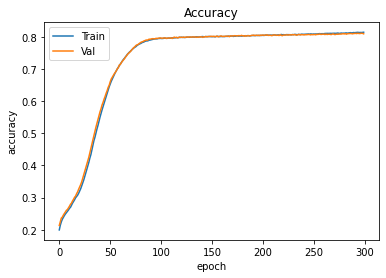

In [96]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Test the model

In [97]:
results = modelCard.evaluate(obsInputNumpyTest, obsOutputNumpyTest, batch_size=1000)

5/5 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.8062
